# Ball Tracking
### Team Catan 

##### Read and show the video file

In [1]:
import cv2
import glob

In [2]:
# give the directory and the px size of the video files
# of the recordings you want to show and track
recording_dir = '../recordings_2024-02-27_13h38m/'
# give the pixel size of the video files
px_size = 128

In [3]:

mp4_files = glob.glob(recording_dir + '*.mp4')
cap = None
if not mp4_files:
    print('No mp4 files found')
else:
    first_file = mp4_files[0]
    cap = cv2.VideoCapture(first_file)

if not cap.isOpened():
    print("Error opening video stream or file")

else:
    while cap.isOpened():
        ret, frame = cap.read()
        if not ret:
            break
        cv2.imshow('Frame', frame)
        if cv2.waitKey(25) & 0xFF == ord('q'): # Press q to exit
            break
            
cap.release()
cv2.destroyAllWindows()

#### Detect the red ball and show

In [4]:
import numpy as np

cap = cv2.VideoCapture(mp4_files[0])

detected_ball = None
last_frame = None
lower_red = np.array([0, 0, 100], dtype=np.uint8)
upper_red = np.array([75, 75, 255], dtype=np.uint8)


while cap.isOpened():
    # Read a frame from the video
    ret, frame = cap.read()

    # Check if the frame was read successfully
    if not ret:
        break
    # Create a mask to isolate the red color
    mask = cv2.inRange(frame, lower_red, upper_red)
    # Apply the mask to the frame to detect the red color
    detected_ball = cv2.bitwise_and(frame, frame, mask=mask)
    #   cv2.imshow('Current Frame', frame)
    cv2.imshow('Detected Ball', detected_ball)
    last_frame = frame
    if cv2.waitKey(25) & 0xFF == ord('q'): # Press q to exit
        break

cap.release()
cv2.destroyAllWindows()

#### Show the amount of frames in the video

In [5]:
cap = cv2.VideoCapture(mp4_files[0])
length = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
length

1474

#### Get and Show the coordinates of the red ball in one frame

In [6]:
# get all the coordinates of the pixels that are between the lower and upper red
red_coordinates = np.column_stack(np.where((last_frame[:, :, 0] >= lower_red[0]) & (last_frame[:, :, 0] <= upper_red[0]) &
    (last_frame[:, :, 1] >= lower_red[1]) & (last_frame[:, :, 1] <= upper_red[1]) &
    (last_frame[:, :, 2] >= lower_red[2]) & (last_frame[:, :, 2] <= upper_red[2])
))
# invert the y-axis so that the origin is at the bottom left
red_coordinates[:, 0] = last_frame.shape[0] - red_coordinates[:, 0]

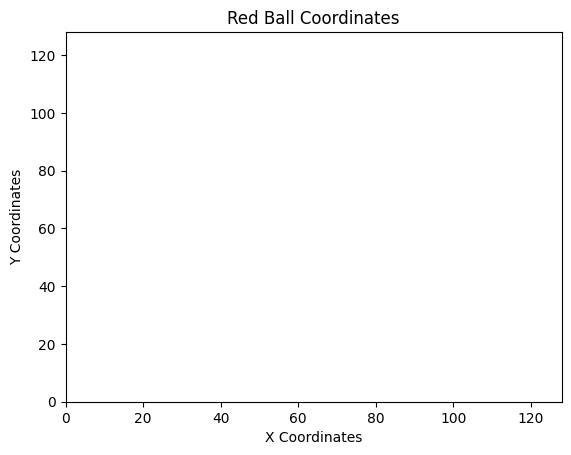

In [7]:
from matplotlib import pyplot as plt
plt.scatter(red_coordinates[:, 1], red_coordinates[:, 0], c='red', marker='.')
plt.title('Red Ball Coordinates')
plt.xlabel('X Coordinates')
plt.ylabel('Y Coordinates')
plt.xlim(0, px_size)
plt.ylim(0, px_size)
plt.show()


In [8]:
# calculate the mean of the x and y coordinates
mean_x = np.mean(red_coordinates[:, 1])
mean_y = np.mean(red_coordinates[:, 0])
mean_x, mean_y

C:\Users\xande\venv\lib\site-packages\numpy\core\fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\xande\venv\lib\site-packages\numpy\core\_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


(nan, nan)

#### Get the middle coordinate of the red ball in all frames

In [9]:
from utils.ball_tracker_calculations import calculate_middle_points_of_ball
cap = cv2.VideoCapture(mp4_files[0])

lower_red = np.array([0, 0, 100], dtype=np.uint8)
upper_red = np.array([75, 75, 255], dtype=np.uint8)
mean_x, mean_y = calculate_middle_points_of_ball(cap, lower_red, upper_red)

### Show the trajectory of the ball

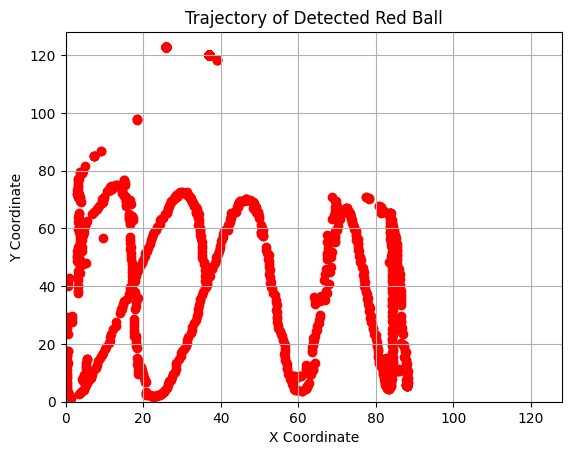

In [10]:
from matplotlib import pyplot as plt
# Plot the trajectory
plt.scatter(mean_x, mean_y, marker='o', linestyle='-', color='red')
plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')
plt.title('Trajectory of Detected Red Ball')

# Invert the y-axis if needed
plt.xlim(0, px_size)
plt.ylim(0, px_size)
plt.grid(True)
plt.show()